# 常微分方程 Ordinary Differential Equation
*例子来自《python数学建模算法与应用》*

## 洛伦兹模型
$$
\begin{cases} \dot{x} = \sigma(y - x) \\
              \dot{y} =  \rho x - y -xz \\ 
              \dot{z} = xy - \beta z \end{cases}
$$

In [1]:
from rich import print
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
from enum import IntEnum
# from enum import Enum  #

使用odeint需将高阶方程转成一阶微分方程组的形式，这里已经有了这种形式。

In [2]:
class Var(IntEnum):  # 具有隐式转换成int的IntEnum，实际工程中不要乱用
    x = 0
    y = 1
    z = 2

sigma, rho, beta = 10, 28, 8/3
g = lambda vars, t: [sigma * (vars[Var.y] - vars[Var.x]),
                    rho * vars[Var.x] - vars[Var.y] - vars[Var.x] * vars[Var.z],
                    vars[Var.x] * vars[Var.y] - beta * vars[Var.z]]  # 照着写
s01 = np.random.rand(3)  # 生成三个随机初始值
t0 = np.linspace(0, 50, 5000)

In [3]:
s1: np.ndarray = odeint(g, s01, t0)  # 方程组，初始值array，自变量取值
print(s1.shape)  # 5000 * 3 的矩阵 分别为 x,y,z在给定区间上的数值解

(5000, 3)

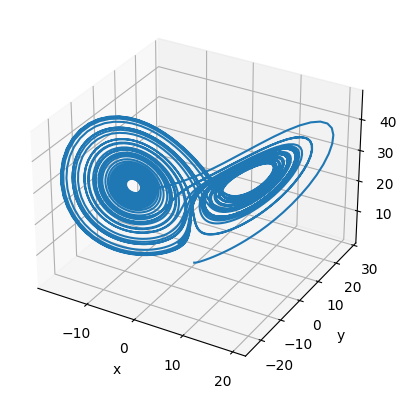

In [4]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.set_xlabel('x'), ax.set_ylabel('y')  #, ax.set_label('z')  # 怎么set_zlable呢？
plt.plot(s1[:, Var.x], s1[:, Var.y], s1[:, Var.z])
plt.show()  # 轨线

轨线表示了点(三维向量)在三维坐标下的运动，在这幅图中最后趋于稳定。***虽然没画出运动方向***

当然，上图还有许多不尽人意之处，比如：
- 没画出位置随时间的变化
- 扭曲的环是怎么回事，书上说是蝴蝶效应的体现，但说得很不清楚

In [5]:
from matplotlib.animation import FuncAnimation
from matplotlib import animation
#实现动图
%matplotlib qt5

fig2, ax2 = plt.subplots(subplot_kw={"projection": "3d"})
ax2.set_xlabel('x'), ax2.set_ylabel('y')
x, y, z = s1[:, Var.x], s1[:, Var.y], s1[:, Var.z]
x_p, y_p, z_p = [], [], []

def update(frames):
    x_p.append(x[frames])
    y_p.append(y[frames])
    z_p.append(z[frames])
    plt.plot(x_p, y_p, z_p)

ani = FuncAnimation(fig2, update, frames=len(x), interval=10, blit=False, repeat=False)  # 创建动画效果
plt.show()
# ani.save("animation.gif", fps=25, writer="imagemagick")

很简单的实现，但是太卡了，将blit置为True，即部分重绘，可得

In [10]:
%matplotlib qt5
fig3, ax3 = plt.subplots(subplot_kw={"projection": "3d"})  # 3D图

ax3.set(xlim3d=(-20, 20), xlabel='X')
ax3.set(ylim3d=(-20, 20), ylabel='Y')
ax3.set(zlim3d=(0, 50), zlabel='Z')

x, y, z = s1[:, Var.x], s1[:, Var.y], s1[:, Var.z]
line, = ax3.plot([], [], [], "-")  # -> list[line2D] 所以要加个',' artist

def update3(frames):
    line.set_data(x[:frames], y[:frames])
    line.set_3d_properties(z[:frames])
    return line,

ani = FuncAnimation(fig3, update3, frames=len(x), interval=1, blit=True, repeat=False, cache_frame_data=False)  # 创建动画效果
ani.save('Animation.mp4',writer='ffmpeg',fps=1000)  # 实测用ffmepg能保证帧率，gif不行，而且gif巨慢，导出这个视频用了5分钟

关于ffmepg的下载 -> [ffmepg](https://blog.csdn.net/fenghefeng123/article/details/123016913)

## 两个种群相互作用模型 # TODO